In [0]:
import numpy as np
#pg 32 in text book for algorithm 

## One Arm Bandit 

In [0]:
#version 4 - weighted average update for nonstationary problem - pg 32 
class Bandit_Alpha: 
    def __init__(self):
        mu = 1
        sigma = 1
        self.mu = abs(np.random.rand()*mu)   #set the acutal mean
        self.sigma = abs(np.random.rand()*sigma)  #set the standard deviation 
                
        self.numPulls = 0 #n
        self.payout = 0 #R_i
        #self.payoutTotal = 0
        #self.payoutArr = np.array([]) 
        self.calcMuAtt = 0.5 #Q_1
        self.alpha = 0.1 #alpha is an element of (0,1)
        
        
    def pull(self):
        self.numPulls = self.numPulls + 1 #to avoid division by 0 
        self.payout = np.array([(self.sigma*np.random.randn()+self.mu)]) #1 sample of normal distribution #https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.randn.html
        self.calcMuAtt = self.calcMuAtt + self.alpha*(self.payout-self.calcMuAtt)
         
    
    def calcMu(self): #this is Q_t(a)=sum of the rewards when action(a) was taken / number of times action(a) was taken 
        if self.numPulls == 0:
            return 0 
        else:  
            return self.calcMuAtt

In [0]:
#version 3 - using algorithm on pg 31
class Bandit_eGreedy: 
    def __init__(self):
        mu = 1
        sigma = 1
        self.mu = abs(np.random.rand()*mu)   #set the acutal mean
        self.sigma = abs(np.random.rand()*sigma)  #set the standard deviation 
        
        self.numPulls = 0 #n
        self.payout = 0 #R_i
        #self.payoutTotal = 0
        #self.payoutArr = np.array([]) 
        self.calcMuAtt = 0 #Q_1
        
        
    def pull(self):
        self.numPulls = self.numPulls + 1 #to avoid division by 0 
        self.payout = np.array([(self.sigma*np.random.randn()+self.mu)]) #1 sample of normal distribution #https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.randn.html
        self.calcMuAtt = self.calcMuAtt + (1/self.numPulls)*(self.payout-self.calcMuAtt)
         
    
    def calcMu(self): #this is Q_t(a)=sum of the rewards when action(a) was taken / number of times action(a) was taken 
        if self.numPulls == 0:
            return 0 
        else:  
            return self.calcMuAtt

### Older versions of Bandit class

In [0]:
#version 4 - weighted average update for nonstationary problem - pg 32 
class Bandit: 
    def __init__(self):
        mu = 1
        sigma = 1
        self.mu = abs(np.random.rand()*mu)   #set the acutal mean
        self.sigma = abs(np.random.rand()*sigma)  #set the standard deviation 
                
        self.numPulls = 0 #n
        self.payout = 0 #R_i
        #self.payoutTotal = 0
        #self.payoutArr = np.array([]) 
        self.calcMuAtt = 0.5 #Q_1
        self.alpha = 0.1 #alpha is an element of (0,1)
        
        
    def pull(self):
        self.numPulls = self.numPulls + 1 #to avoid division by 0 
        self.payout = np.array([(self.sigma*np.random.randn()+self.mu)]) #1 sample of normal distribution #https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.randn.html
        self.calcMuAtt = self.calcMuAtt + self.alpha*(self.payout-self.calcMuAtt)
         
    
    def calcMu(self): #this is Q_t(a)=sum of the rewards when action(a) was taken / number of times action(a) was taken 
        if self.numPulls == 0:
            return 0 
        else:  
            return self.calcMuAtt

In [0]:
#version 2 - accumulator to accumulate total payout 
class Bandit: 
    def __init__(self):
        mu = 1
        sigma = 1
        self.mu = abs(np.random.rand()*mu)   #set the acutal mean
        self.sigma = abs(np.random.rand()*sigma)  #set the standard deviation 
        
        self.numPulls = 0
        self.payout = 0 
        self.payoutTotal = 0
        #self.payoutArr = np.array([])      
        
        
    def pull(self):
        self.payout = np.array([(self.sigma*np.random.randn()+self.mu)]) #1 sample of normal distribution #https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.randn.html
        self.payoutTotal += self.payout
        self.numPulls = self.numPulls + 1 
         
        
    def calcMu(self): #this is Q_t(a)=sum of the rewards when action(a) was taken / number of times action(a) was taken 
        if self.numPulls == 0:
            return 0 
        else:  
            return self.payoutTotal/self.numPulls 
           

In [0]:
#version 1 - array to accumulate total payout 
class Bandit: 
    def __init__(self):
        mu = 1
        sigma = 1
        self.mu = abs(np.random.rand()*mu)   #set the acutal mean
        self.sigma = abs(np.random.rand()*sigma)  #set the standard deviation 
        
        self.numPulls = 0
        self.payout = 0 
        self.payoutArr = np.array([])      
        
        
    def pull(self):
        self.payout = np.array([(self.sigma*np.random.randn()+self.mu)]) #1 sample of normal distribution #https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.randn.html
        self.payoutArr = np.append(self.payoutArr,self.payout)
        self.numPulls = self.numPulls + 1 
         
        
    def calcMu(self): #this is Q_t(a)=sum of the rewards when action(a) was taken / number of times action(a) was taken 
        if self.numPulls == 0:
            return 0 
        else:  
            return np.sum(self.payoutArr)/self.numPulls 
           

### Test Bandits

In [0]:
#Test the Bandit 
# mu = calcMu approximately 

b1 = Bandit()

for i in range (1000):
    b1.pull() 
    
print ("mu:", b1.mu)
#print ("payoutArr:", b1.payoutArr)
print ("calcMu:",b1.calcMu())
print ('sum of payoutArr:',np.sum(b1.payoutArr))
print ("numPulls:",b1.numPulls)


In [0]:
#make multiple Bandits 
numBandits = 5
numPulls = 5

banditList = [Bandit() for i in range(numBandits)]

for i in range(numBandits):
    for j in range (numPulls):
        banditList[i].pull()

for i in range (numBandits):
    print ("mu:", banditList[i].mu)
    #print ("payoutArr:", b1.payoutArr)
    print ("calcMu:",banditList[i].calcMu())
    print ('sum of payoutArr:',np.sum(banditList[i].payoutArr))
    print ("numPulls:",banditList[i].numPulls)
    print ()

In [0]:
#pull arm of random Bandit -> determine which had the highest average  

numBandits = 10 
numPulls = 10

banditList = [Bandit() for i in range(numBandits)]

for i in range (5):
    banditList[np.random.randint(numBandits)].pull()


## Multi Arm Bandit (MAB)

In [0]:
#version 2
class MultiArmBandit:
    def __init__(self, numArms, banditType):
        self.numArms = numArms
        if banditType == 'Bandit':
            self.arm = [Bandit() for i in range(numArms)] #numArms = numBandits 
        if banditType == 'Bandit_eGreedy':
            self.arm = [Bandit_eGreedy() for i in range(numArms)]
        if banditType == 'Bandit_Alpha':
            self.arm = [Bandit_Alpha() for i in range(numArms)]
        
    def pull(self,armIndex):
        self.arm[armIndex].pull()
    
    def pullRand(self):
        randInt = np.random.randint(self.numArms)
        self.arm[randInt].pull()
        #print (randInt,self.arm[randInt].calcMu())
        
    def argMaxVal(self):
        argMaxVal = 0 
        for i in range(self.numArms):
            if (self.arm[i].calcMu() > self.arm[argMaxVal].calcMu()): #problem here - need to compare to max!! 
                argMaxVal = i                       
        return argMaxVal
    
    def aveReward(self):
        total = 0 
        for i in range(self.numArms):
            total += self.arm[i].calcMu()
        return total/self.numArms

### older version of MAB class

In [0]:
#version 1
class MultiArmBandit:
    def __init__(self, numArms):
        self.numArms = numArms
        self.arm = [Bandit() for i in range(numArms)] #numArms = numBandits 
        
    def pull(self,armIndex):
        self.arm[armIndex].pull()
    
    def pullRand(self):
        randInt = np.random.randint(self.numArms)
        self.arm[randInt].pull()
        #print (randInt,self.arm[randInt].calcMu())
        
    def argMaxVal(self):
        argMaxVal = 0 
        for i in range(self.numArms):
            if (self.arm[i].calcMu() > self.arm[argMaxVal].calcMu()): #problem here - need to compare to max!! 
                argMaxVal = i                       
        return argMaxVal
    
    def aveReward(self):
        total = 0 
        for i in range(self.numArms):
            total += self.arm[i].calcMu()
        return total/self.numArms

### Test MAB

In [0]:
#Test MultiArmBandit ArgMax

numArms = 10 #the action index is the index of the arm 
numActions = 10

mab = MultiArmBandit(numArms)

for i in range (numActions):
    mab.pullRand() #action Qt(a)
    
print()
print ('argMaxVal', mab.argMaxVal())


argMaxVal 8


## Distributions

   0.000000  0.007812  0.015625  ...  0.125000  0.250000  0.500000
0 -0.003438  0.027050  0.039760  ...  0.019107  0.033921  0.014271
1  0.000292 -0.013208  0.011829  ...  0.032077  0.044313  0.016820
2  0.004758  0.020266 -0.006175  ...  0.052385  0.114547  0.010821
3  0.007121  0.024610  0.018878  ...  0.053756  0.063526  0.022913
4  0.014166  0.024335  0.025494  ...  0.050461  0.052102  0.016127

[5 rows x 8 columns]


Text(0, 0.5, 'average reward')

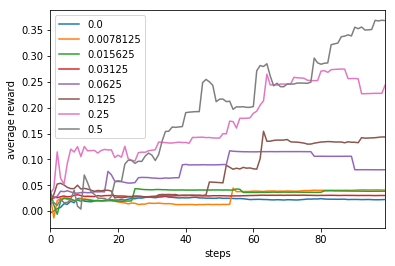

In [30]:
#Distribution 1 - eGreedy
#Getting greedy - varying epsilon 
#epsilon 0.1 -> very greedy (more exploitaion) | epsilon 0.9 -> not greedy (more exploration)  

import numpy as np 
import pandas as pd
import matplotlib 

#hyperparameters 
epsilon = {0:0, 1:1/128, 2:1/64, 3:1/32, 4:1/16, 5:1/8, 6:1/4, 7:1/2, 8:1}  #epsilon is an element of (0,1)
numArms = 30 #the action index is the index of the arm 
numActions =1000
numMabs = 8

#instances of mabs 
mabList = [(MultiArmBandit(numArms,'Bandit_eGreedy')) for i in range(numMabs)]

#reward accumulator 
aveRewardArrList = [np.array([]) for i in range(numMabs)]
aveRewardDF_eGreedy = pd.DataFrame()

for m in range (numMabs): 
    e = epsilon[m]
    for i in range (numActions): 
        x = np.random.rand()
        if (x < e): #explore 
            mabList[m].pullRand()
        elif (x > e):
            mabList[m].pull(mabList[m].argMaxVal()) #exploit 

        aveRewardArrList[m] = np.append(aveRewardArrList[m],mabList[m].aveReward())

    aveRewardDF_eGreedy[epsilon[m]] = aveRewardArrList[m]

#display result
print (aveRewardDF_eGreedy.head())
ax = aveRewardDF_eGreedy.head(100).plot()
ax.set_xlabel('steps')
ax.set_ylabel('average reward')

       0.25      0.50      1.00      2.00      4.00      5.00
0  0.015972  0.016066  0.017101  0.011745  0.017738  0.019324
1  0.015594  0.016535  0.035796  0.011238  0.013882  0.034755
2  0.014420  0.015958  0.037418  0.012714  0.014963  0.051057
3  0.013873  0.016215  0.037202  0.012214  0.014577  0.049815
4  0.013423  0.017069  0.038224  0.011992  0.015712  0.052431


Text(0, 0.5, 'average reward')

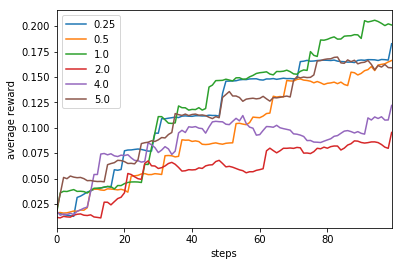

In [31]:
#Distribution 2 - alpha = 0.1 (vary Q_0)
#Getting greedy with alpha  

import numpy as np 
import pandas as pd
import matplotlib 

#hyperparameters 
epsilon = 0.1  #epsilon is an element of (0,1)
numArms = 30 #the action index is the index of the arm 
numActions =1000
numMabs = 6
Q_0 = {0:1/4, 1:1/2, 2:1, 3:2, 4:4, 5:5}

#instances of mabs 
mabList = [(MultiArmBandit(numArms,'Bandit_Alpha')) for i in range(numMabs)]

#reward accumulator 
aveRewardArrList = [np.array([]) for i in range(numMabs)]
aveRewardDF_Alpha = pd.DataFrame()

for m in range (numMabs): 
    e = epsilon
    mabList[m].calcMuAtt = Q_0[m]
    for i in range (numActions): 
        x = np.random.rand()
        if (x < e): #explore 
            mabList[m].pullRand()
        elif (x > e):
            mabList[m].pull(mabList[m].argMaxVal()) #exploit 

        aveRewardArrList[m] = np.append(aveRewardArrList[m],mabList[m].aveReward())

    aveRewardDF_Alpha[Q_0[m]] = aveRewardArrList[m]

#display result 
print (aveRewardDF_Alpha.head())
ax = aveRewardDF_Alpha.head(100).plot()
ax.set_xlabel('steps')
ax.set_ylabel('average reward')


## Plotting comparison of algorithms 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1001: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


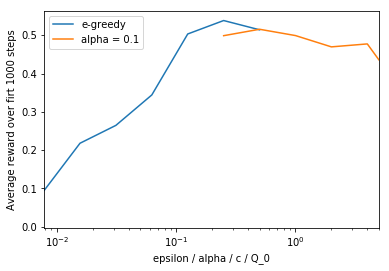

In [32]:
#plotting ALL 

eGreedyDF = (aveRewardDF_eGreedy[-1:].T)
eGreedyDF.columns = ['e-greedy'] 

AlphaDF = (aveRewardDF_Alpha[-1:].T)
AlphaDF.columns = ['alpha = 0.1'] 

ax = eGreedyDF.plot()
ax.set_xlabel('epsilon / alpha / c / Q_0')
ax.set_xscale('log')
ax.set_ylabel('Average reward over firt 1000 steps')

#eGreedyDF.plot(ax=ax)
AlphaDF.plot(ax=ax)

